In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df = pd.read_csv('ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [40]:
df.shape

(17966, 9)

In [41]:
categorical_columns = df.select_dtypes(exclude='number').columns

for column in categorical_columns:
    print(column, ':', df[column].unique())
    print('Number of unique values of', column, 'column =', df[column].nunique())
    print()

model : [' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' 'Focus']
Number of unique values of model column = 24

transmission : ['Automatic' 'Manual' 'Semi-Auto']
Number of unique values of transmission column = 3

fuelType : ['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']
Number of unique values of fuelType column = 5



In [42]:
df['model'].value_counts()

model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64

In [43]:
df['transmission'].value_counts()

transmission
Manual       15518
Automatic     1361
Semi-Auto     1087
Name: count, dtype: int64

In [44]:
df['fuelType'].value_counts()

fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

In [45]:
df[df['fuelType'] == 'Other']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17492,Mondeo,2015,13800,Automatic,19470,Other,0,67.3,2.0


In [46]:
df[df['model'] == ' Mondeo']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
35,Mondeo,2019,20000,Manual,24,Diesel,145,65.7,2.0
138,Mondeo,2015,9995,Manual,30753,Diesel,0,78.5,1.5
167,Mondeo,2016,9998,Manual,38358,Diesel,0,78.5,1.5
318,Mondeo,2017,17498,Semi-Auto,14569,Diesel,145,53.3,2.0
322,Mondeo,2019,22998,Automatic,7337,Hybrid,140,47.1,2.0
...,...,...,...,...,...,...,...,...,...
17711,Mondeo,2018,17999,Automatic,3570,Petrol,145,44.1,1.5
17751,Mondeo,2011,5495,Manual,104000,Diesel,200,47.1,2.2
17776,Mondeo,2016,10500,Manual,54004,Diesel,30,64.2,2.0
17823,Mondeo,2017,15499,Automatic,10162,Petrol,235,38.2,5.0


In [47]:
for column in categorical_columns:
    df[column] = df[column].str.strip()

In [48]:
df[(df['model'] == 'Mondeo') & (df['transmission'] == 'Automatic')].groupby('fuelType').size()

fuelType
Diesel      60
Electric     2
Hybrid      16
Other        1
Petrol      42
dtype: int64

In [49]:
df[(df['model'] == 'Mondeo') & (df['transmission'] == 'Automatic') & (df['fuelType'] == 'Hybrid')]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
322,Mondeo,2019,22998,Automatic,7337,Hybrid,140,47.1,2.0
3925,Mondeo,2017,18290,Automatic,9641,Hybrid,145,56.5,2.0
4410,Mondeo,2017,17080,Automatic,27498,Hybrid,145,56.5,2.0
4807,Mondeo,2016,12995,Automatic,42165,Hybrid,0,67.3,2.0
5790,Mondeo,2019,22500,Automatic,7058,Hybrid,140,47.1,2.0
10536,Mondeo,2020,24979,Automatic,2213,Hybrid,135,47.9,2.0
10991,Mondeo,2019,22899,Automatic,4665,Hybrid,135,47.1,2.0
11104,Mondeo,2019,25890,Automatic,4200,Hybrid,135,46.3,2.0
12574,Mondeo,2016,12990,Automatic,42500,Hybrid,0,67.3,2.0
13177,Mondeo,2019,25400,Automatic,12145,Hybrid,135,47.9,2.0


In [50]:
df['fuelType'] = df['fuelType'].replace('Other', 'Hybrid')

In [51]:
df[(df['model'] == 'Mondeo') & (df['transmission'] == 'Automatic')].groupby('fuelType').size()

fuelType
Diesel      60
Electric     2
Hybrid      17
Petrol      42
dtype: int64

In [52]:
df['fuelType'].value_counts()

fuelType
Petrol      12179
Diesel       5762
Hybrid         23
Electric        2
Name: count, dtype: int64

In [53]:
numerical_columns = df.select_dtypes(include='number').columns
df[numerical_columns].map(np.isinf).sum()

year          0
price         0
mileage       0
tax           0
mpg           0
engineSize    0
dtype: int64

In [54]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [55]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [56]:
df['price'] = df.pop('price')
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0,16500


In [57]:
numerical_columns = df.select_dtypes(include='number').columns

n_cols = 3
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

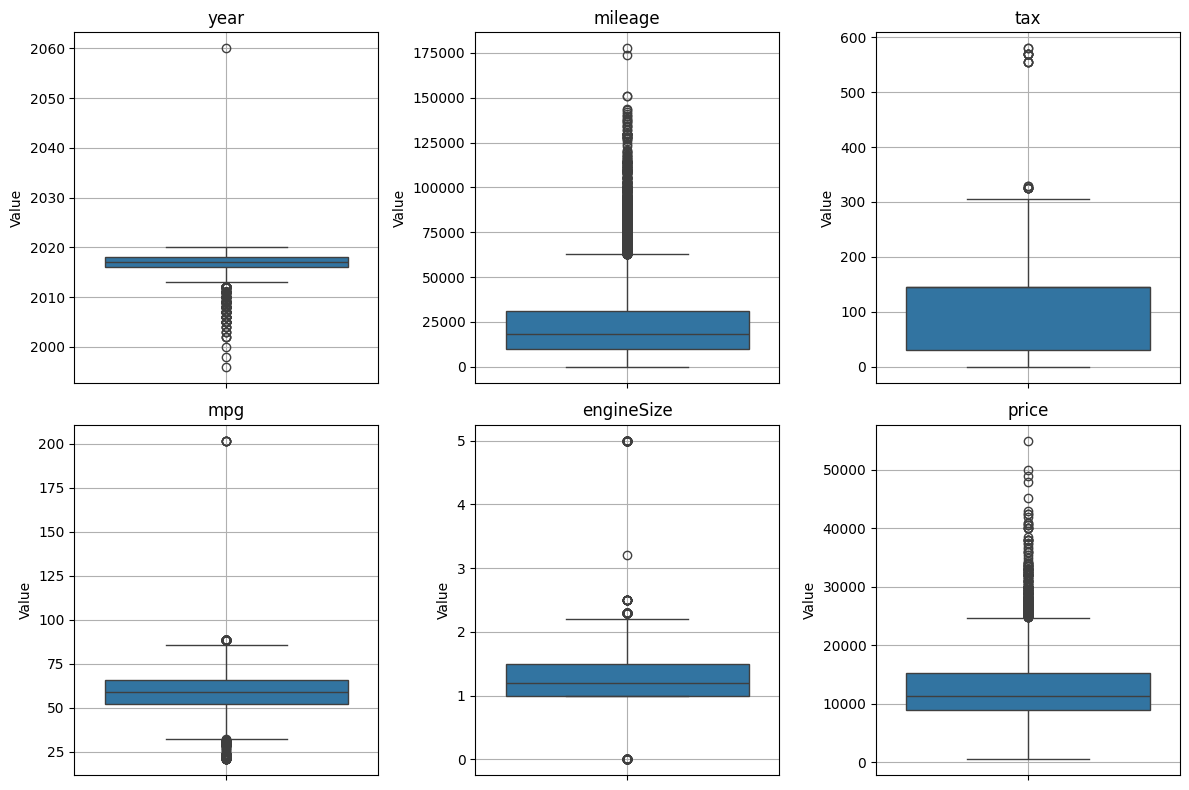

In [58]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for index, column in enumerate(numerical_columns):
    sns.boxplot(data=df[column], ax=axes[index])
    axes[index].set_title(column)
    axes[index].set_ylabel('Value')
    axes[index].grid(True)
    
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

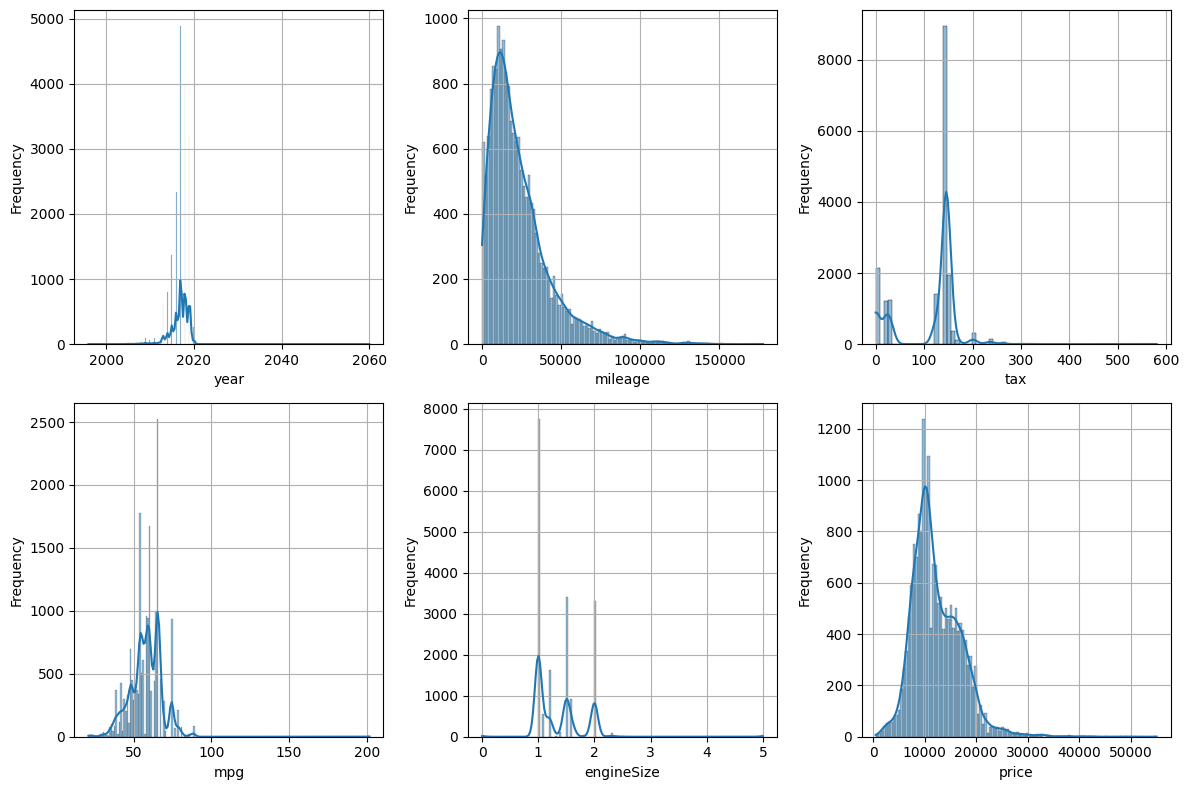

In [59]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for index, column in enumerate(numerical_columns):
    sns.histplot(data=df[column], ax=axes[index], kde=True)
    axes[index].set_ylabel('Frequency')
    axes[index].grid(True)
    
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[index])
    
plt.tight_layout()
plt.show()

In [60]:
for column in numerical_columns[:-1]:
    print(column, ':', df[column].skew())

year : -1.2826010773963363
mileage : 1.8420676988442957
tax : -0.564082137792832
mpg : 0.6039230694032055
engineSize : 1.8931206703965726


In [61]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df[numerical_columns[:-1]] = pt.fit_transform(df[numerical_columns[:-1]])

c:\Python310\lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [62]:
for column in numerical_columns[:-1]:
    print(column, ':', df[column].skew())

year : 0.6436237325259657
mileage : 0.033705986006984275
tax : -0.8152847129968465
mpg : 0.18421029564163377
engineSize : -0.09556510517773774


In [63]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
df[numerical_columns[:-1]] = robust_scaler.fit_transform(df[numerical_columns[:-1]])

In [64]:
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,0.000000,Automatic,-0.116442,Petrol,0.039615,-0.089724,-0.442551,12000
1,Focus,0.504918,Manual,-0.544810,Petrol,0.039615,-0.089724,-0.442551,14000
2,Focus,0.000000,Manual,-0.315408,Petrol,0.039615,-0.089724,-0.442551,13000
3,Fiesta,1.019864,Manual,-0.445577,Petrol,0.000000,-1.439277,0.557449,17500
4,Fiesta,1.019864,Automatic,-1.449320,Petrol,0.000000,-0.775513,-0.442551,16500


In [65]:
df.insert(1, 'transmission', df.pop('transmission'))
df.insert(2, 'fuelType', df.pop('fuelType'))
df.head()

,model,transmission,fuelType,year,mileage,tax,mpg,engineSize,price
0,Fiesta,Automatic,Petrol,0.000000,-0.116442,0.039615,-0.089724,-0.442551,12000
1,Focus,Manual,Petrol,0.504918,-0.544810,0.039615,-0.089724,-0.442551,14000
2,Focus,Manual,Petrol,0.000000,-0.315408,0.039615,-0.089724,-0.442551,13000
3,Fiesta,Manual,Petrol,1.019864,-0.445577,0.000000,-1.439277,0.557449,17500
4,Fiesta,Automatic,Petrol,1.019864,-1.449320,0.000000,-0.775513,-0.442551,16500


In [66]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
    print(column.capitalize(), 'Mapping :', mapping)

Model Mapping : {0: 'B-MAX', 1: 'C-MAX', 2: 'EcoSport', 3: 'Edge', 4: 'Escort', 5: 'Fiesta', 6: 'Focus', 7: 'Fusion', 8: 'Galaxy', 9: 'Grand C-MAX', 10: 'Grand Tourneo Connect', 11: 'KA', 12: 'Ka+', 13: 'Kuga', 14: 'Mondeo', 15: 'Mustang', 16: 'Puma', 17: 'Ranger', 18: 'S-MAX', 19: 'Streetka', 20: 'Tourneo Connect', 21: 'Tourneo Custom', 22: 'Transit Tourneo'}
Transmission Mapping : {0: 'Automatic', 1: 'Manual', 2: 'Semi-Auto'}
Fueltype Mapping : {0: 'Diesel', 1: 'Electric', 2: 'Hybrid', 3: 'Petrol'}


In [67]:
df.head()

,model,transmission,fuelType,year,mileage,tax,mpg,engineSize,price
0,5,0,3,0.000000,-0.116442,0.039615,-0.089724,-0.442551,12000
1,6,1,3,0.504918,-0.544810,0.039615,-0.089724,-0.442551,14000
2,6,1,3,0.000000,-0.315408,0.039615,-0.089724,-0.442551,13000
3,5,1,3,1.019864,-0.445577,0.000000,-1.439277,0.557449,17500
4,5,0,3,1.019864,-1.449320,0.000000,-0.775513,-0.442551,16500


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = df.iloc[:, :8]
Y = df.iloc[:, 8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

In [69]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=101)
rfr.fit(X_train, Y_train)

Y_pred_train = rfr.predict(X_train)
Y_pred_test = rfr.predict(X_test)

print('-- Trained Data --')
print('R2-Score Accuracy :', r2_score(Y_train, Y_pred_train))
print('Mean Absolute Error :', mean_absolute_error(Y_train, Y_pred_train))
print('Mean Squared Error :', mean_squared_error(Y_train, Y_pred_train))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(Y_train, Y_pred_train)))

print('\n-- Test Data --')
print('R2-Score Accuracy :', r2_score(Y_test, Y_pred_test))
print('Mean Absolute Error :', mean_absolute_error(Y_test, Y_pred_test))
print('Mean Squared Error :', mean_squared_error(Y_test, Y_pred_test))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

-- Trained Data --
R2-Score Accuracy : 0.9895306561941635
Mean Absolute Error : 326.5636539888254
Mean Squared Error : 233073.12721679718
Root Mean Squared Error : 482.7764774891142

-- Test Data --
R2-Score Accuracy : 0.9253666476514153
Mean Absolute Error : 895.8891335077518
Mean Squared Error : 1710494.7346163203
Root Mean Squared Error : 1307.858835890296


In [70]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(random_state=101)
xgbr.fit(X_train, Y_train)

Y_pred_train = xgbr.predict(X_train)
Y_pred_test = xgbr.predict(X_test)

print('-- Trained Data --')
print('R2-Score Accuracy :', r2_score(Y_train, Y_pred_train))
print('Mean Absolute Error :', mean_absolute_error(Y_train, Y_pred_train))
print('Mean Squared Error :', mean_squared_error(Y_train, Y_pred_train))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(Y_train, Y_pred_train)))

print('\n-- Test Data --')
print('R2-Score Accuracy :', r2_score(Y_test, Y_pred_test))
print('Mean Absolute Error :', mean_absolute_error(Y_test, Y_pred_test))
print('Mean Squared Error :', mean_squared_error(Y_test, Y_pred_test))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

-- Trained Data --
R2-Score Accuracy : 0.9676076548542122
Mean Absolute Error : 629.0569718891653
Mean Squared Error : 721132.6059237559
Root Mean Squared Error : 849.1952696075008

-- Test Data --
R2-Score Accuracy : 0.9327792920784357
Mean Absolute Error : 837.7987380083264
Mean Squared Error : 1540607.025395098
Root Mean Squared Error : 1241.2119180039715


In [71]:
from xgboost import XGBRFRegressor

xgbrf = XGBRFRegressor(random_state=101)
xgbrf.fit(X_train, Y_train)

Y_pred_train = xgbrf.predict(X_train)
Y_pred_test = xgbrf.predict(X_test)

print('-- Trained Data --')
print('R2-Score Accuracy :', r2_score(Y_train, Y_pred_train))
print('Mean Absolute Error :', mean_absolute_error(Y_train, Y_pred_train))
print('Mean Squared Error :', mean_squared_error(Y_train, Y_pred_train))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(Y_train, Y_pred_train)))

print('\n-- Test Data --')
print('R2-Score Accuracy :', r2_score(Y_test, Y_pred_test))
print('Mean Absolute Error :', mean_absolute_error(Y_test, Y_pred_test))
print('Mean Squared Error :', mean_squared_error(Y_test, Y_pred_test))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

-- Trained Data --
R2-Score Accuracy : 0.8815901529849965
Mean Absolute Error : 1228.1266444251319
Mean Squared Error : 2636091.98903792
Root Mean Squared Error : 1623.6046283002274

-- Test Data --
R2-Score Accuracy : 0.8777993610797161
Mean Absolute Error : 1234.3162417052306
Mean Squared Error : 2800672.123953704
Root Mean Squared Error : 1673.5208764618694


In [72]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=101)
gbr.fit(X_train, Y_train)

Y_pred_train = gbr.predict(X_train)
Y_pred_test = gbr.predict(X_test)

print('-- Trained Data --')
print('R2-Score Accuracy :', r2_score(Y_train, Y_pred_train))
print('Mean Absolute Error :', mean_absolute_error(Y_train, Y_pred_train))
print('Mean Squared Error :', mean_squared_error(Y_train, Y_pred_train))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(Y_train, Y_pred_train)))

print('\n-- Test Data --')
print('R2-Score Accuracy :', r2_score(Y_test, Y_pred_test))
print('Mean Absolute Error :', mean_absolute_error(Y_test, Y_pred_test))
print('Mean Squared Error :', mean_squared_error(Y_test, Y_pred_test))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

-- Trained Data --
R2-Score Accuracy : 0.9206133384552404
Mean Absolute Error : 953.4291572970144
Mean Squared Error : 1767340.7052716604
Root Mean Squared Error : 1329.4136697325105

-- Test Data --
R2-Score Accuracy : 0.9109094079613915
Mean Absolute Error : 992.4141938896715
Mean Squared Error : 2041834.9677519265
Root Mean Squared Error : 1428.9279085216044


In [73]:
from sklearn.ensemble import VotingRegressor

vr = VotingRegressor(estimators=[('rf', rfr), ('xgb', xgbr)], weights=[0.8, 1])
vr.fit(X_train, Y_train)

Y_pred_train = vr.predict(X_train)
Y_pred_test = vr.predict(X_test)

print('-- Trained Data --')
print('R2-Score Accuracy :', r2_score(Y_train, Y_pred_train))
print('Mean Absolute Error :', mean_absolute_error(Y_train, Y_pred_train))
print('Mean Squared Error :', mean_squared_error(Y_train, Y_pred_train))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(Y_train, Y_pred_train)))

print('\n-- Test Data --')
print('R2-Score Accuracy :', r2_score(Y_test, Y_pred_test))
print('Mean Absolute Error :', mean_absolute_error(Y_test, Y_pred_test))
print('Mean Squared Error :', mean_squared_error(Y_test, Y_pred_test))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

-- Trained Data --
R2-Score Accuracy : 0.9809477202486759
Mean Absolute Error : 479.15506691241444
Mean Squared Error : 424150.21462709067
Root Mean Squared Error : 651.2681587695583

-- Test Data --
R2-Score Accuracy : 0.9343058814765415
Mean Absolute Error : 833.5001858807772
Mean Squared Error : 1505619.676640013
Root Mean Squared Error : 1227.036949989695


In [74]:
import pickle

with open('FordCarPrice_Predictor.pkl', 'wb') as file:
    pickle.dump({'Model' : vr, 'Transformer' : pt, 'Scaler' : robust_scaler}, file)
    
with open('FordCarPrice_Predictor.pkl', 'rb') as file:
    data = pickle.load(file)
    loaded_model = data['Model']
    
print('Accuracy of the loaded model :', loaded_model.score(X_test, Y_test))

Accuracy of the loaded model : 0.9343058814765415
